# URLs para obtenção dos datasets (Obtido dia 07/06/2021)
- ### Explicação dos datasets: https://repositoriodatasharingfapesp.uspdigital.usp.br/
- ### Dataset do hospital Albert Einstein: https://repositoriodatasharingfapesp.uspdigital.usp.br/handle/item/98 - (2020-06-30)
- ### Dataset do hospital Sirio Libanes: https://repositoriodatasharingfapesp.uspdigital.usp.br/handle/item/97 (2020-06-30)
- ### Dataset do hospital Beneficencia Portuguesa: https://repositoriodatasharingfapesp.uspdigital.usp.br/handle/item/101 (2021-04-28)
- ### Dataset do grupo Fleury: https://repositoriodatasharingfapesp.uspdigital.usp.br/handle/item/99 - (2020-06-30)
- ### Dataset do hospital das clinicas da faculdade de medicina da Universidade de São Paulo: https://repositoriodatasharingfapesp.uspdigital.usp.br/handle/item/100 - (2021-02-17)

# 1. Importing Libraries

In [1]:
import json
import os
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

current_path = os.path.abspath(os.getcwd())
sys.path.append(f"{current_path}/../libs")

from plot import plot_confusion_matrix, plot_table
from dataframe import read_dataset
from report import dataset_info_report, model_report, feature_selection_report
from preprocess import remove_sparse_rows, remove_sparse_columns, under_sampling, one_hot_encoded
from feature_selection import get_k_best, fs_results_filter
from cross_validation import get_folds
from config import load_config

# 2. Defining Constants and Globals

In [2]:
config = load_config("../config.yaml")

# 3. Auxiliar Functions

# 4. Reading Feature Selection Results

In [3]:
with open(config.REPORT_PATH+'feature-analysis.json', 'r') as fp:
    features_report = json.load(fp)

# 5. Plot Thresholds for Feature Selection

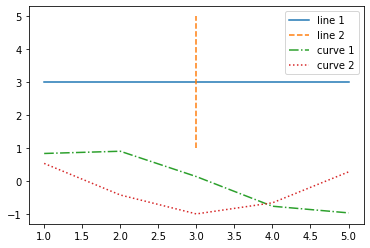

In [4]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = [1,2,3,4,5]
y = [3,3,3,3,3]
  
# plot lines
plt.plot(x, y, label = "line 1", linestyle="-")
plt.plot(y, x, label = "line 2", linestyle="--")
plt.plot(x, np.sin(x), label = "curve 1", linestyle="-.")
plt.plot(x, np.cos(x), label = "curve 2", linestyle=":")
plt.legend()
plt.show()

In [5]:
def get_data():

SyntaxError: unexpected EOF while parsing (3310128034.py, line 1)

In [28]:
def get_avg(ml_model):
    n_features = []
    for i in range(config.N_FEATURES_THRESHOLD):
        value = 0
        for dataset_name, dataset in ml_model.items():
            if dataset_name != "concatenated-dataset":
                # value += dataset[f"{i+1} features"]["accuracy"]
                value += dataset[f"{i+1} features"]["recall"]
        n_features.append(value/(len(ml_model)-1))
    return n_features


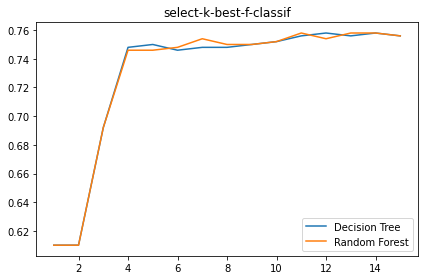

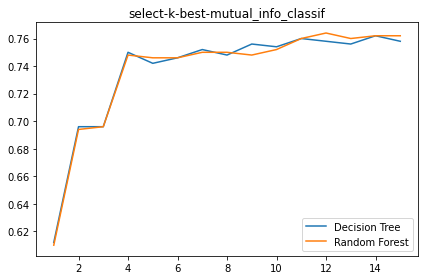

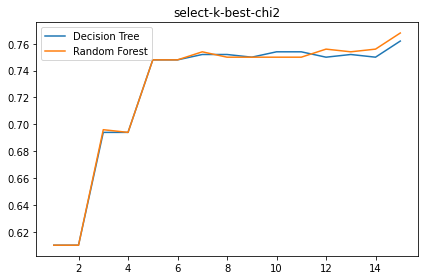

In [32]:
plot_fs_results = []
for fs_model_name, fs_model in features_report.items():
    model_results = []
    for ml_model_name, ml_model in fs_model.items():
        avg = get_avg(ml_model)
        model_results.append(avg)
    plot_fs_results.append(model_results)


x = list(range(1,config.N_FEATURES_THRESHOLD+1))

labels = config.MODELS
path = f"{config.PLOTS_PATH}feature-selection-analysis/"
if not os.path.exists(path):
    os.makedirs(path)


for results,title in zip(plot_fs_results,features_report.keys()):

    path=f"{path}{title}"
    save=True
    
    for y,label in zip(results,labels):
# plot lines
        plt.plot(x, y, label = label, linestyle="-")
    plt.title((title))
    if save:
        plt.tight_layout()
        plt.savefig((path + ".jpg"), dpi=300, bbox_inches="tight")
    # plt.close()
    plt.legend()
    plt.show()

In [5]:
features_report

{'select-k-best-f-classif': {'Decision Tree': {'concatenated-dataset': {'1 features': {'accuracy': 0.63,
     'precision': 0.71,
     'recall': 0.44,
     'f1-score': 0.54,
     'confusion matrix': {'tp': '0.44',
      'tn': '0.82',
      'fp': '0.18',
      'fn': '0.56'}},
    '2 features': {'accuracy': 0.63,
     'precision': 0.7,
     'recall': 0.44,
     'f1-score': 0.54,
     'confusion matrix': {'tp': '0.44',
      'tn': '0.81',
      'fp': '0.19',
      'fn': '0.56'}},
    '3 features': {'accuracy': 0.71,
     'precision': 0.72,
     'recall': 0.68,
     'f1-score': 0.7,
     'confusion matrix': {'tp': '0.68',
      'tn': '0.74',
      'fp': '0.26',
      'fn': '0.32'}},
    '4 features': {'accuracy': 0.77,
     'precision': 0.79,
     'recall': 0.75,
     'f1-score': 0.77,
     'confusion matrix': {'tp': '0.75',
      'tn': '0.8',
      'fp': '0.2',
      'fn': '0.25'}},
    '5 features': {'accuracy': 0.77,
     'precision': 0.78,
     'recall': 0.75,
     'f1-score': 0.77,
   